## Introduction
This script calculates the potential increase of photocurrent. The question that I want to resolve in this calculation is: does any kind of back reflector help the absorption of crystalline silicon?

## Method
I assume we have a 100%-reflectivity mirror attached at the back side of silicon substrate. The structure is like this:

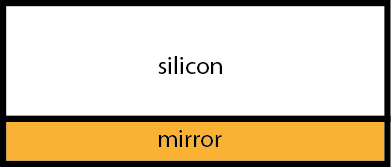

In [2]:
from IPython.display import Image
Image("si_back_reflector.png")

We use experimental absorption coefficients of crystalline silicon and assume that the absorptivity follows Beer-Lambert's law. Also, we assume that every abosorped photons can be converted into electrons. In this case, having a 100% reflector on the back side of silicon can be thought of as doubling the thickness of silicon substrate.

## Calculation

In [14]:
%matplotlib inline
from photocurrent import gen_qe_from_abs,calc_jsc
from illumination import illumination
from spectrum_base import spectrum_base
import numpy as np
import matplotlib.pyplot as plt


abs_file = "/Users/kanhua/Dropbox/DDocuments/Programming projects/Python/pypvcell/examples/si_alpha.csv"

si_alpha = np.loadtxt(abs_file, delimiter=',')
si_alpha_sp = spectrum_base()
si_alpha_sp.set_spectrum(si_alpha[:, 0], si_alpha[:, 1], wavelength_unit='m')

layer_t=np.logspace(-8,-3,num=100)
jsc_baseline=np.zeros(layer_t.shape)

jsc_full_r=np.zeros(layer_t.shape)

it=np.nditer(layer_t,flags=['f_index'])
while not it.finished:

    t=it[0] #thickness of Si layer

    qe=gen_qe_from_abs(si_alpha_sp,t)
    jsc_baseline[it.index]=calc_jsc(illumination(), qe)

    # Assme 100% reflection on the back side, essentially doubling the thickness of silicon
    qe_full_r=gen_qe_from_abs(si_alpha_sp,t*2)
    jsc_full_r[it.index]=calc_jsc(illumination(),qe_full_r)

    it.iternext()
it.reset()

### Photocurrent with and without the back reflector

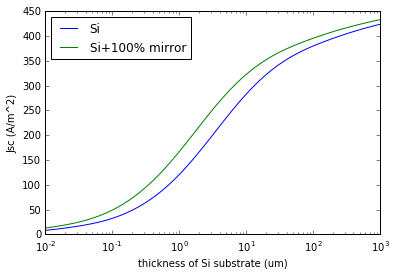

In [15]:
plt.semilogx(layer_t*1e6, jsc_baseline,hold=True,label="Si")
plt.semilogx(layer_t*1e6,jsc_full_r,label="Si+100% mirror")
plt.xlabel("thickness of Si substrate (um)")
plt.ylabel("Jsc (A/m^2)")
plt.legend(loc="best")

### Normlize the Jsc(Si+mirror) by Jsc(Si only)

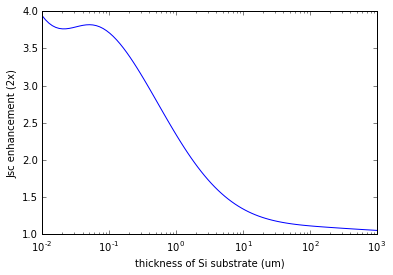

In [19]:
plt.semilogx(layer_t*1e6,jsc_full_r/jsc_baseline)
plt.xlabel("thickness of Si substrate (um)")
plt.ylabel("Jsc enhancement (2x)")
plt.show()

We can see that the back reflector can be very effective when the thickness of silicon substrate is thin (< 1um). Silicon substrates with more than 10-um thicknesses cannot be benefited from this structure very well. This is the reason that photonic or plasmonic structure are useful for thin-film or ultra-thin-film silicon cell, but not conventional bulk crystalline silicon cell.

### More audacious assumption

Assume that somehow we have a novel reflector that can increase the optical absorption length by 10 times.

In [24]:
while not it.finished:

    t=it[0] #thickness of Si layer

    qe=gen_qe_from_abs(si_alpha_sp,t)
    jsc_baseline[it.index]=calc_jsc(illumination(), qe)

    # Assme 100% reflection on the back side, essentially doubling the thickness of silicon
    qe_full_r=gen_qe_from_abs(si_alpha_sp,t*10)
    jsc_full_r[it.index]=calc_jsc(illumination(),qe_full_r)

    it.iternext()
it.reset()

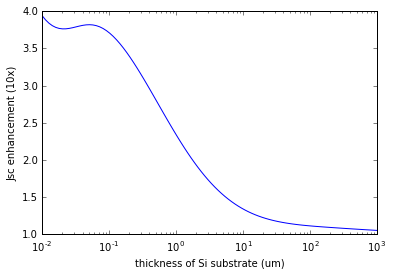

In [25]:
plt.semilogx(layer_t*1e6,jsc_full_r/jsc_baseline)
plt.xlabel("thickness of Si substrate (um)")
plt.ylabel("Jsc enhancement (10x)")
plt.show()

We can see that increasing the optical absorption length by 10 times does not increase the photocurrent much for thick silicon substrates.

## Conclusion
The result is not to say that using photonic/plasmonic structure to enhance the photocurrent of thick silicon substrates is completely hopeless. In my view, to make this possible, this photonic/plasmonic structure should

1. Have the absortpion mechanism other than Beer-Lambert's law.
2. Increase the optical abosrption length of silicon by a very large amount (at least 10 times or more).